In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Upload Data Set
data = pd.read_excel("/content/EDA DATA.csv.xlsx")

In [ ]:
#Display Basic Info and structure of data
data.info()
data.shape
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
#Checking Null values
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
#Summary Statistics
data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.377387,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.484918,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [ ]:
#Fill Null value with the average value of the column
data["Age"].fillna(data["Age"].mean(),inplace=True)

<ipython-input-82-85ac01e37010>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].fillna(data["Age"].mean(),inplace=True)


In [ ]:
data["Fare"].fillna(data["Fare"].mean(),inplace=True)

<ipython-input-83-1706b35b6c59>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Fare"].fillna(data["Fare"].mean(),inplace=True)


In [ ]:
data["Embarked"]=data["Embarked"].fillna("S")

In [ ]:
# fix inconsistent categories
data['Embarked']= data['Embarked'].replace({
    "C": "Cherbourg", "Q": "Queenstown", "S": "Southamton"
})

In [ ]:
# fix inconsistent categories
data['Cabin']= data['Cabin'].replace({
    "S": "General"
})

In [ ]:
data["Cabin"]=data["Cabin"].fillna("General")

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,General,Southamton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,General,Southamton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southamton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,General,Southamton


In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


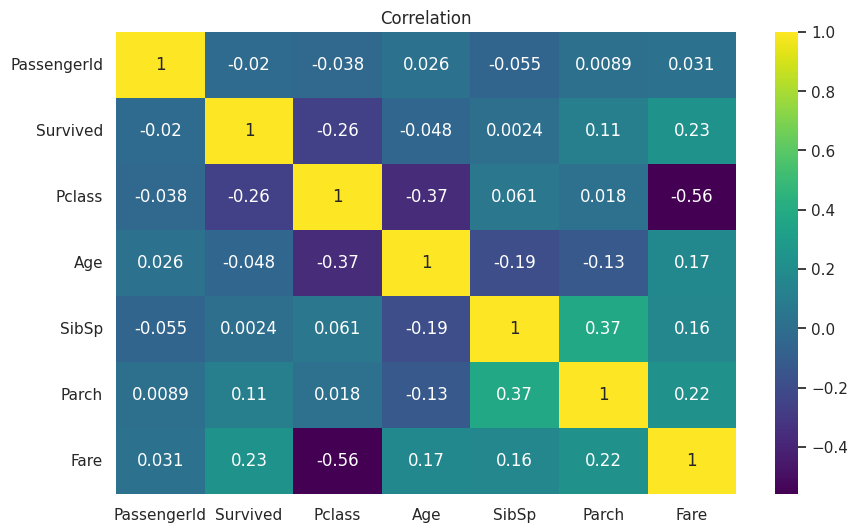

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.select_dtypes(include=np.number).corr(), annot=True,cmap="viridis")
plt.title("Correlation")
plt.show()

In [ ]:
# average age by Embarked
print("Average Age by Embarked:")
data.groupby("Embarked")["Age"].mean().sort_values(ascending=False)

Average Age by Embarked:


,Age
Embarked,
Cherbourg,31.805652
Southamton,29.382162
Queenstown,29.372545


Survived by Embarked


<ipython-input-92-3a9d94da939d>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=data, ci=None)


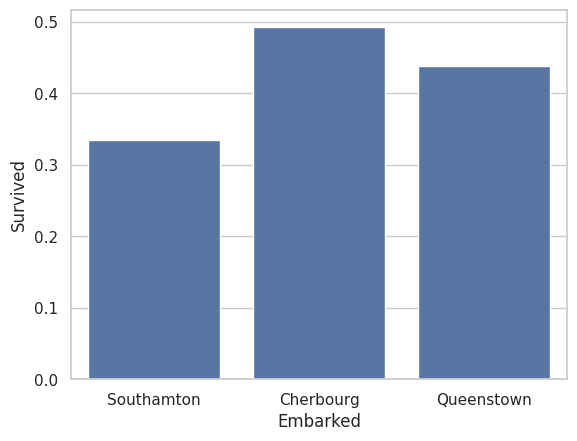

In [ ]:
print("Survived by Embarked")
sns.barplot(x='Embarked', y='Survived', data=data, ci=None)
plt.ylabel("Survived")
plt.xlabel("Embarked")
plt.show()

Show Survived By Passenger Class


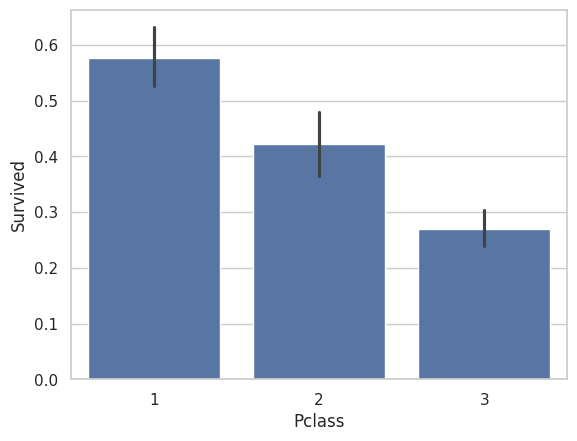

In [ ]:
print("Show Survived By Passenger Class")
sns.barplot(x='Pclass', y='Survived', data=data)
plt.ylabel("Survived")
plt.xlabel("Pclass")
plt.show()
#A Confidence Interval provides a range of values that is likely to contain
#the true population parameter (like mean or proportion), based on a sample.

Gender Who's Travel


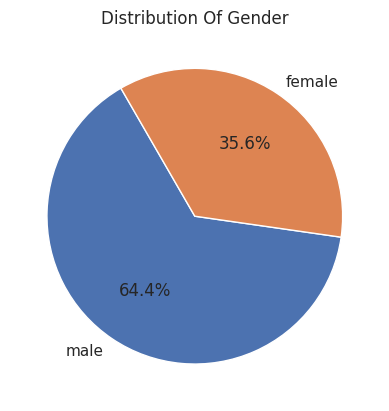

In [ ]:
print("Gender Who's Travel")
category = data['Sex'].value_counts()
category.plot(kind='pie', autopct='%1.1f%%', startangle = 120, color=sns.color_palette("pastel"))
plt.title("Distribution Of Gender")
plt.ylabel("") #hide label
plt.show()

Number Of passenger survived or not


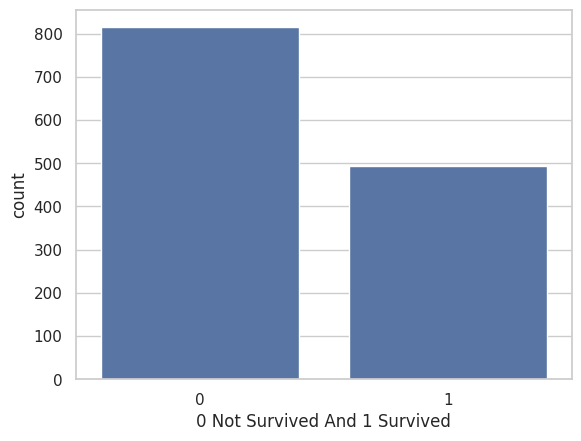

In [ ]:
print("Number Of passenger survived or not")
sns.countplot(x='Survived', data=data)
plt.xlabel("0 Not Survived And 1 Survived")
plt.show()

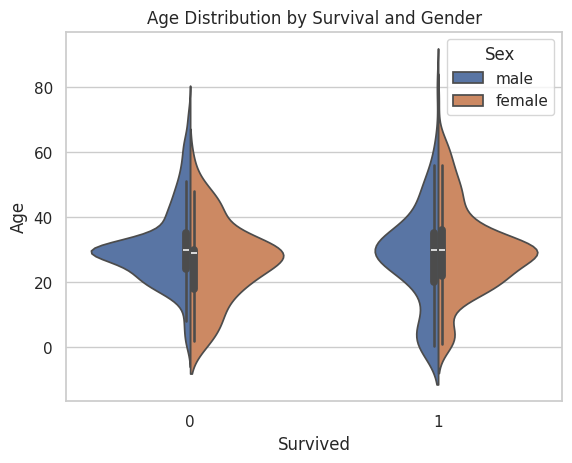

In [ ]:
#how age is distributed among passengers based on survival and gender
sns.violinplot(x='Survived', y='Age', hue='Sex', data=data, split=True)
plt.title('Age Distribution by Survival and Gender')
plt.show()

<ipython-input-97-fae1c9485fe8>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Fare', data=data, ci=None, color='skyblue' )


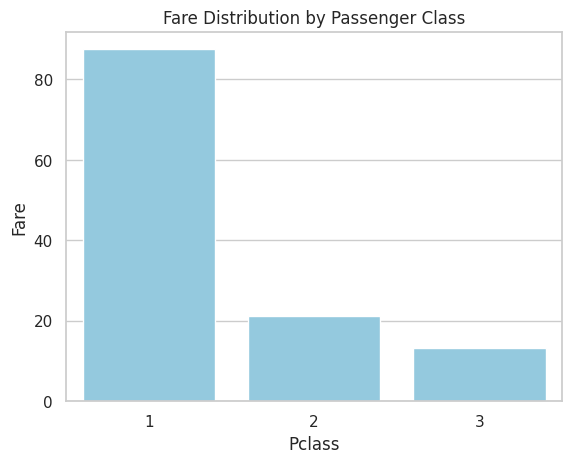

In [ ]:
#Fair Dustribution by the passeger of thier class
sns.barplot(x='Pclass', y='Fare', data=data, ci=None, color='skyblue' )
plt.title('Fare Distribution by Passenger Class')
plt.show()

Travel by Class of Passenger


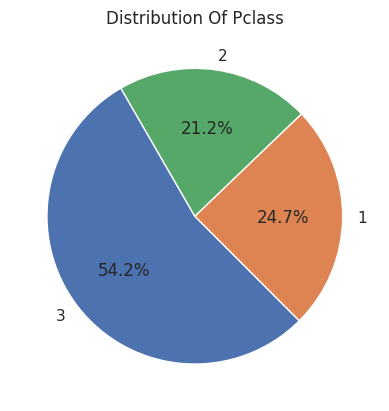

In [ ]:
print("Travel by Class of Passenger")
category = data['Pclass'].value_counts()
category.plot(kind='pie', autopct='%1.1f%%', startangle = 120, color=sns.color_palette("pastel"))
plt.title("Distribution Of Pclass")
plt.ylabel("") #hide label
plt.show()

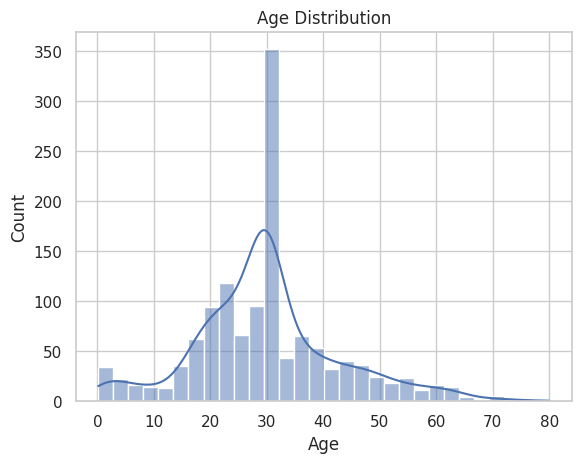

In [ ]:
# Age Dustribution
sns.histplot(data=data, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.show()
#The blue smooth curve is the KDE.
#It shows the estimated density — areas where
#the curve is higher indicate more concentration of data points (more people in that age range).




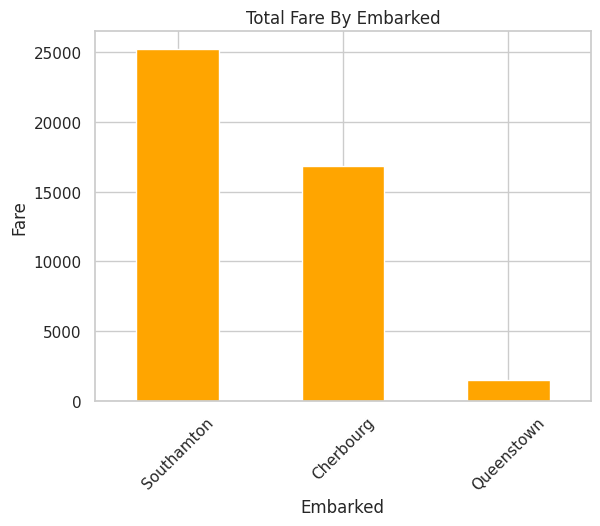

In [ ]:
# Total Fare Distribution by the embarked
total_sales_Segment = data.groupby("Embarked")["Fare"].sum().sort_values(ascending=False)

total_sales_Segment.plot(kind='bar', color='orange')
plt.title("Total Fare By Embarked")
plt.xlabel("Embarked")
plt.ylabel("Fare")
plt.xticks(rotation=45)
plt.show()

# Feature Engineering

In [ ]:
# Create Group of family who's aboard
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

In [ ]:
# Create new column to chaeck who travel alone on the titanic
data['IsAlone'] = (data['FamilySize'] == 1).astype(int)

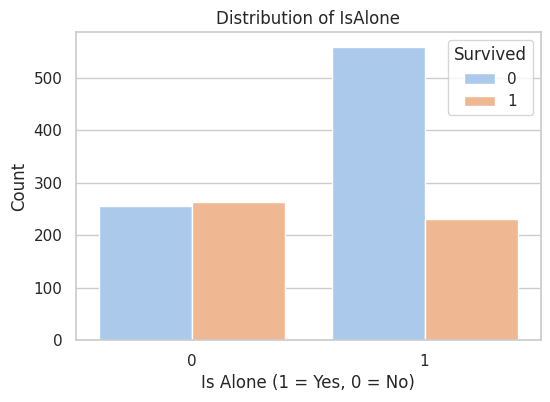

In [ ]:
# Check Survived by the IsAlone
sns.set(style="whitegrid")

# Count plot for 'IsAlone'
plt.figure(figsize=(6,4))
sns.countplot(x='IsAlone', data=data, palette='pastel',hue='Survived')

plt.title('Distribution of IsAlone')
plt.xlabel('Is Alone (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()


# Machin Learning Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.metrics import accuracy_score # Import accuracy_score

# Define features (X) and target (y)
X = data.drop('Survived', axis=1) # Assuming 'Survived' is the target variable
y = data['Survived']

# Select only numeric columns for scaling, as StandardScaler works with numerical data
X_numeric = X.select_dtypes(include=np.number)

# Optional scaling for logistic regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric) # Apply scaling to only numeric features

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7061068702290076


In [ ]:
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,General,Southamton,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,Cherbourg,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,General,Southamton,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,Southamton,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,General,Southamton,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,29.881138,0,0,A.5. 3236,8.0500,General,Southamton,1,1
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,Cherbourg,1,1
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,General,Southamton,1,1
1307,1308,0,3,"Ware, Mr. Frederick",male,29.881138,0,0,359309,8.0500,General,Southamton,1,1


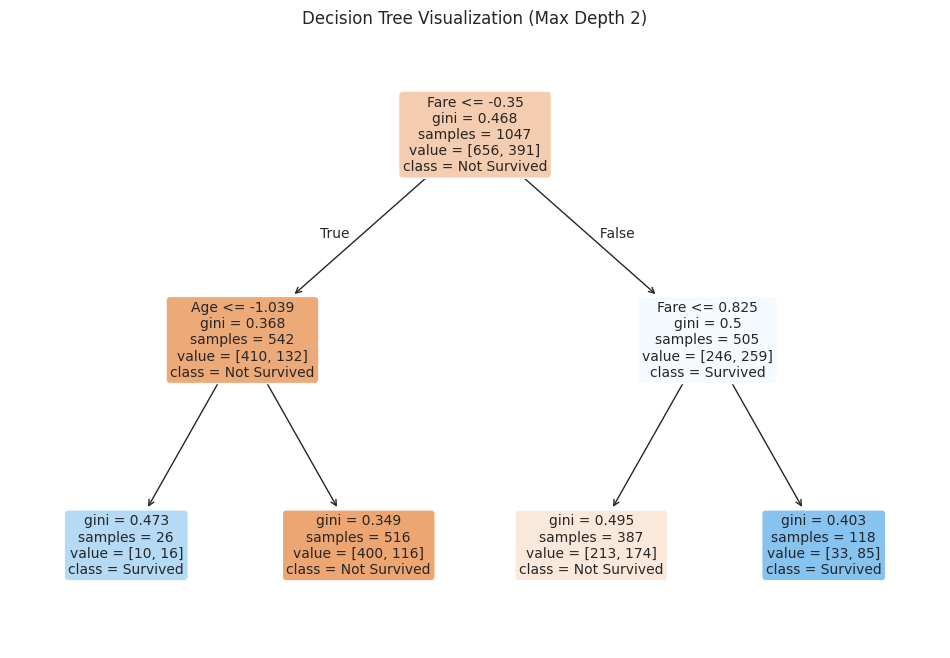

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.preprocessing import StandardScaler # Import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd # Import pandas if not already imported
import numpy as np # Import numpy if not already imported

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42) # Instantiate the classifier with max_depth
clf.fit(X_train, y_train) # Train the classifier on the training data

# Define the feature names used for training
# This should correspond to the columns in X_numeric before scaling
# Assuming the columns in X_numeric are:
# 'Age', 'Fare', 'SibSp', 'Parch', 'FamilySize', 'IsAlone'
features = list(X_numeric.columns)


plt.figure(figsize=(12, 8))  # Increase figure size for better readability

plot_tree(clf, max_depth=2,  # limit tree depth to keep it small
          feature_names=features,
          class_names=['Not Survived', 'Survived'],
          filled=True,
          rounded=True,
          fontsize=10)

plt.title("Decision Tree Visualization (Max Depth 2)")
plt.show()
